In [1]:
import seaborn as sns
import numpy as np
import pickle
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
cl = 'E003'

In [138]:
with open('/gpfs_home/spate116/data/spate116/GCN/%s/res/shapley_0.res' % cl, 'rb') as f:
    x = pickle.load(f)[1]
    
x[0] = x[0][1].reshape(-1, 5, 100)
x[1] = x[1][1].reshape(-1, 5, 100)

with open('/gpfs_home/spate116/data/spate116/GCN/%s/data/data_class1_unflattened.pickle' % cl, 'rb') as f:
    data = pickle.load(f)
    data_embedding = data.x.reshape(data.x.shape[0], 1, data.x.shape[1], data.x.shape[2]).float()
    
torch.tensor(list(map(lambda x: x[0], data.y)), dtype=torch.long)[100:200]

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])

In [81]:
def plt_node(x, idx):
    df = pd.DataFrame(x[0][idx])
    df1 = pd.DataFrame(x[1][idx])
    df.index = ['H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3']
    df1.index = ['H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3']
    grid_kws = {"height_ratios": (.5, .5, .05), "hspace": .2, "wspace": 0, "width_ratios": (.8, .15)}
    fig, ax = plt.subplots(3, 2, figsize=(15,10), dpi=300, gridspec_kw=grid_kws)
    lower = min(np.min(df.to_numpy()), np.min(df1.to_numpy()))
    upper = max(np.max(df.to_numpy()), np.max(df1.to_numpy()))
    bound = max(abs(lower), abs(upper))
    ax[0, 0] = sns.heatmap(df, vmin=-bound, vmax=bound, center=0, ax=ax[0, 0], xticklabels=False, cmap="RdBu", cbar_ax = ax[2, 0], cbar_kws={"orientation": "horizontal", 'label': 'Shapley Score'})
    ax[1, 0] = sns.heatmap(df1, vmin=-bound, vmax=bound, center=0, ax=ax[1, 0], xticklabels=False, cmap="RdBu", cbar_ax = ax[2, 0], cbar_kws={"orientation": "horizontal", 'label': 'Shapley Score'})
    ax[0, 0].set_title('Down Regulation Importance')
    ax[1, 0].set_title('Up Regulation Importance')
    ax[2, 1].axis('off')
    ax[0, 1] = sns.barplot(x = df.sum(axis=1), y = df.index, ax = ax[0, 1])
    ax[0, 1].axis('off')
    ax[1, 1] = sns.barplot(x = df1.sum(axis=1), y = df1.index, ax = ax[1, 1])
    ax[1, 1].axis('off')

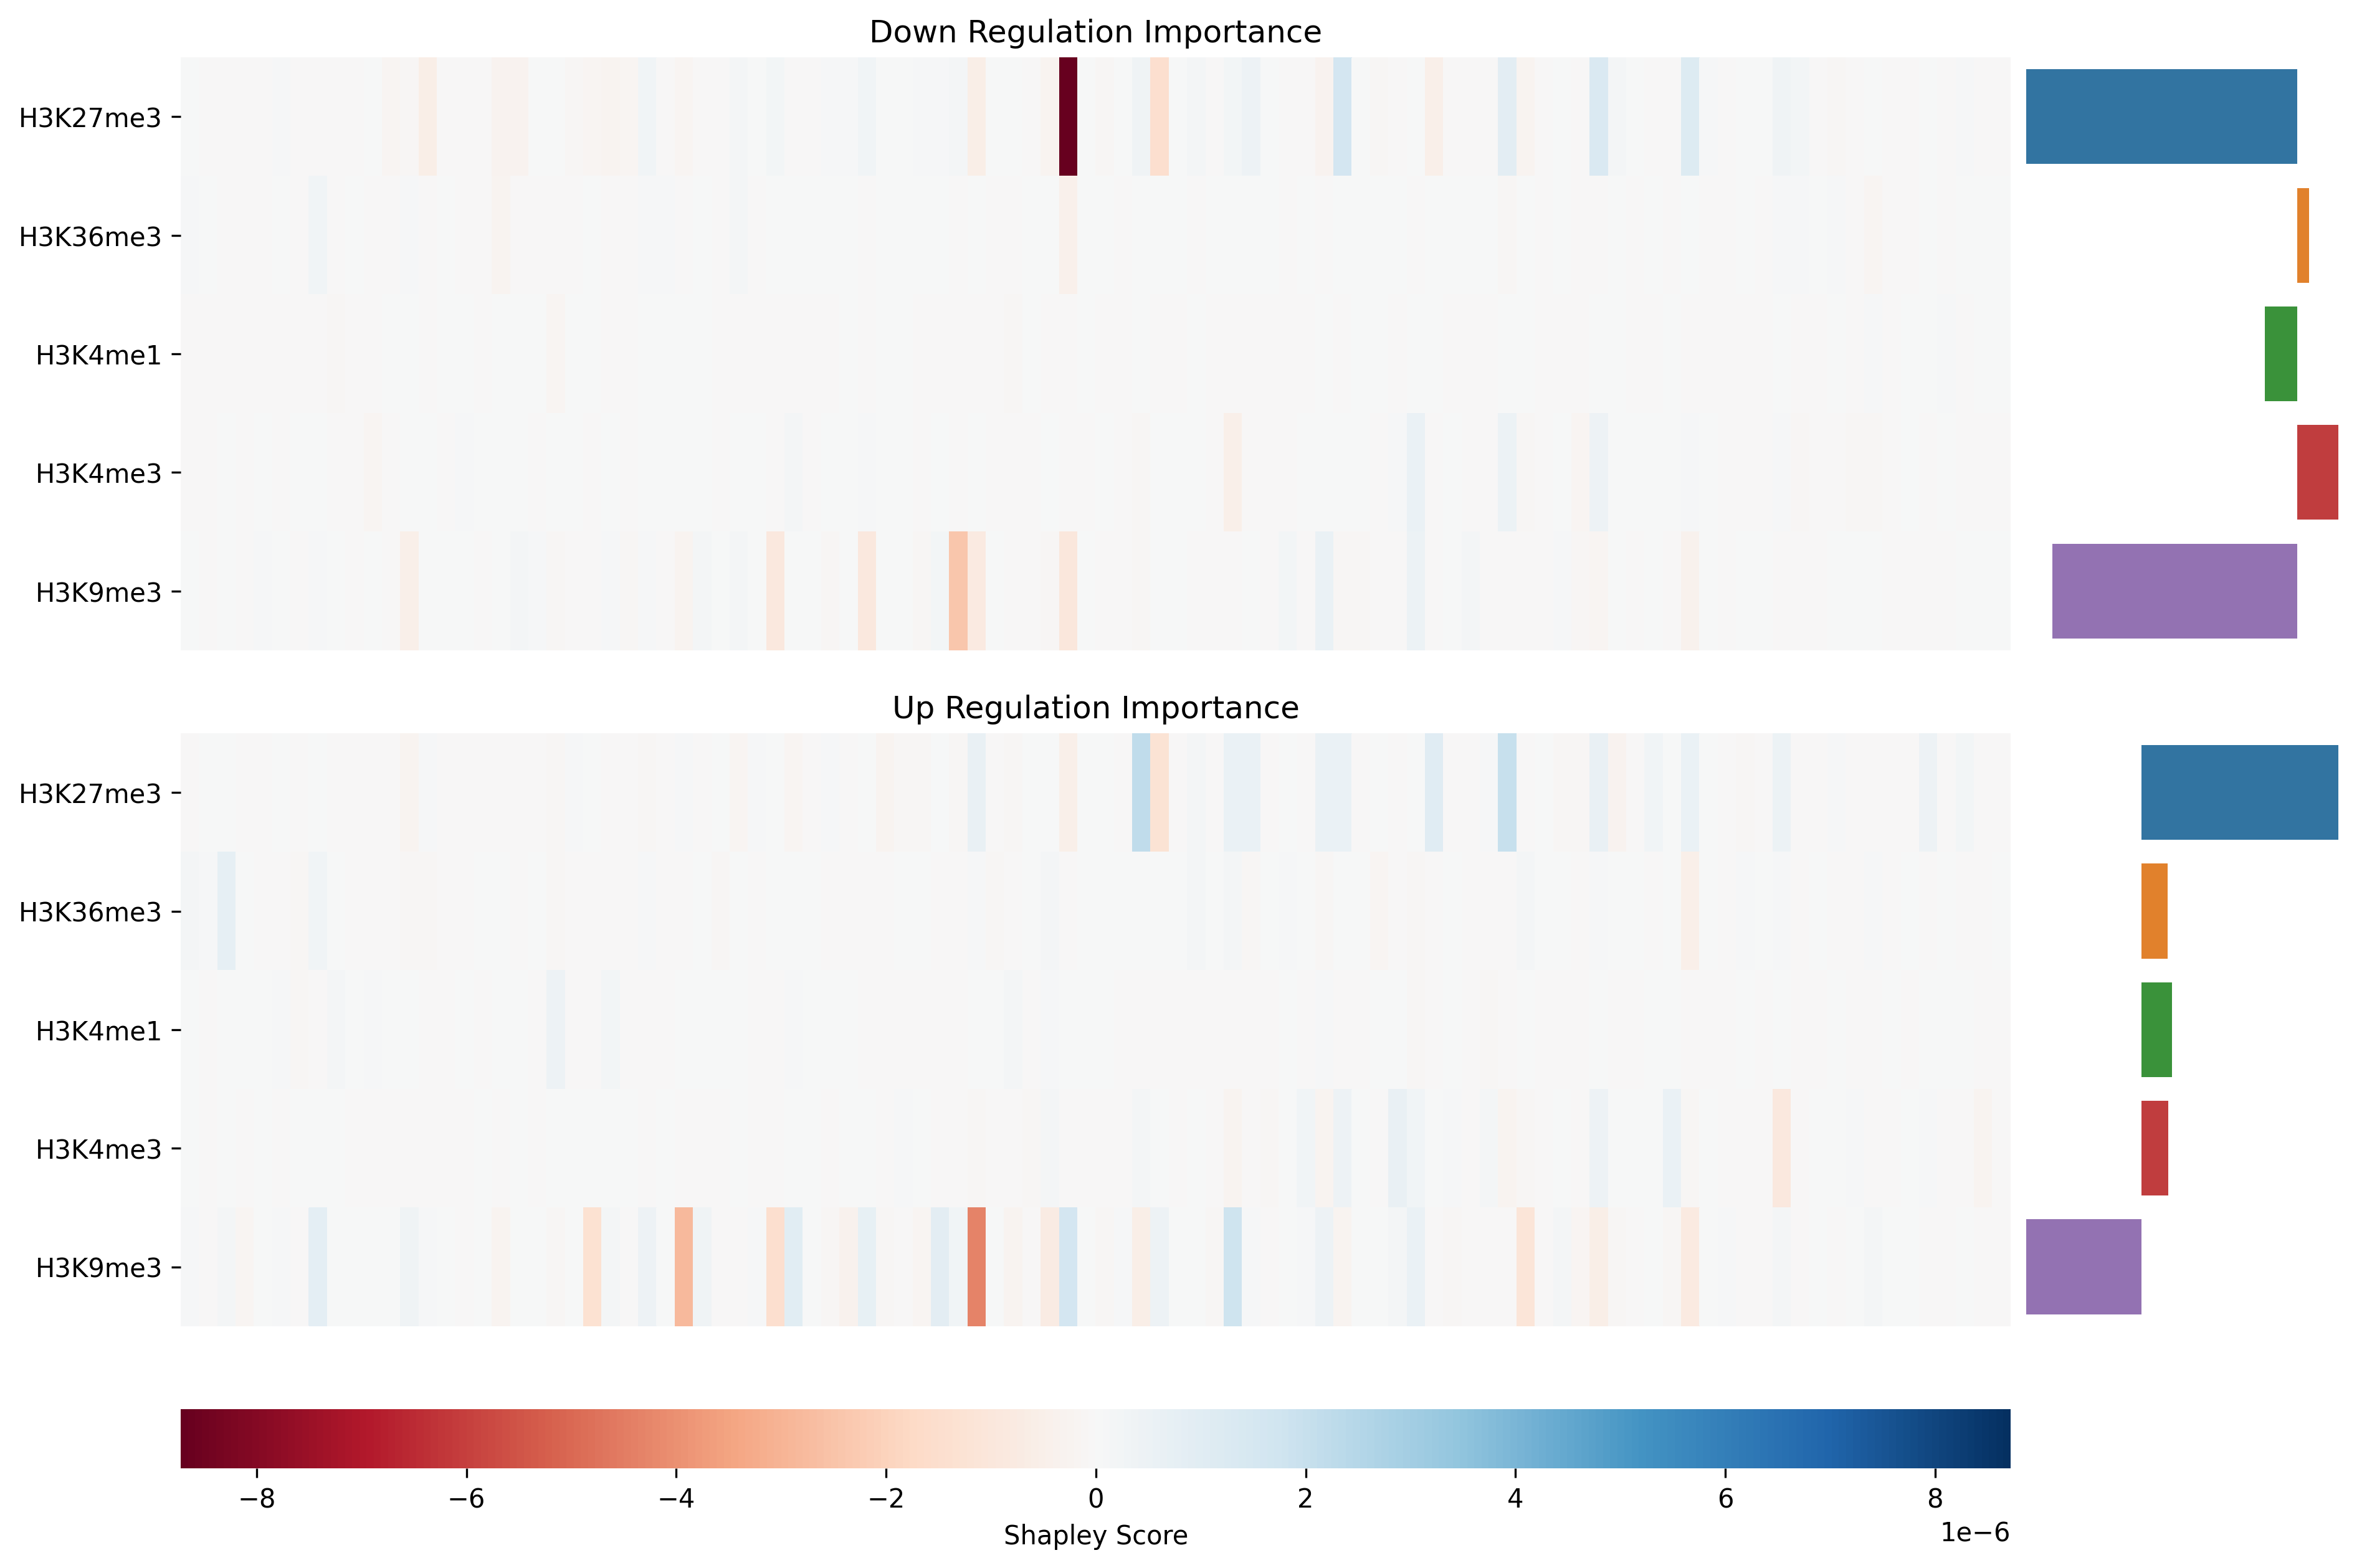

In [82]:
plt_node(x, 5)

In [123]:
def plt_cl(x):
    df = pd.DataFrame(np.sum(x[0], axis=0))
    df1 = pd.DataFrame(np.sum(x[1], axis=0))
    df.index = ['H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3']
    df1.index = ['H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me3', 'H3K9me3']
    grid_kws = {"height_ratios": (.5, .5, .05), "hspace": .2, "wspace": 0, "width_ratios": (.8, .15)}
    fig, ax = plt.subplots(3, 2, figsize=(15,10), dpi=300, gridspec_kw=grid_kws)
    lower = min(np.min(df.to_numpy()), np.min(df1.to_numpy()))
    upper = max(np.max(df.to_numpy()), np.max(df1.to_numpy()))
    bound = max(abs(lower), abs(upper))
    ax[0, 0] = sns.heatmap(df, vmin=-bound, vmax=bound, center=0, ax=ax[0, 0], xticklabels=False, cmap="coolwarm", cbar_ax = ax[2, 0], cbar_kws={"orientation": "horizontal", 'label': 'Shapley Score'})
    ax[1, 0] = sns.heatmap(df1, vmin=-bound, vmax=bound, center=0, ax=ax[1, 0], xticklabels=False, cmap="coolwarm", cbar_ax = ax[2, 0], cbar_kws={"orientation": "horizontal", 'label': 'Shapley Score'})
    ax[0, 0].set_title('Down Regulation Importance')
    ax[1, 0].set_title('Up Regulation Importance')
    ax[2, 1].axis('off')
    ax[0, 1] = sns.barplot(x = df.sum(axis=1), y = df.index, ax = ax[0, 1])
    ax[0, 1].axis('off')
    ax[1, 1] = sns.barplot(x = df1.sum(axis=1), y = df1.index, ax = ax[1, 1])
    ax[1, 1].axis('off')

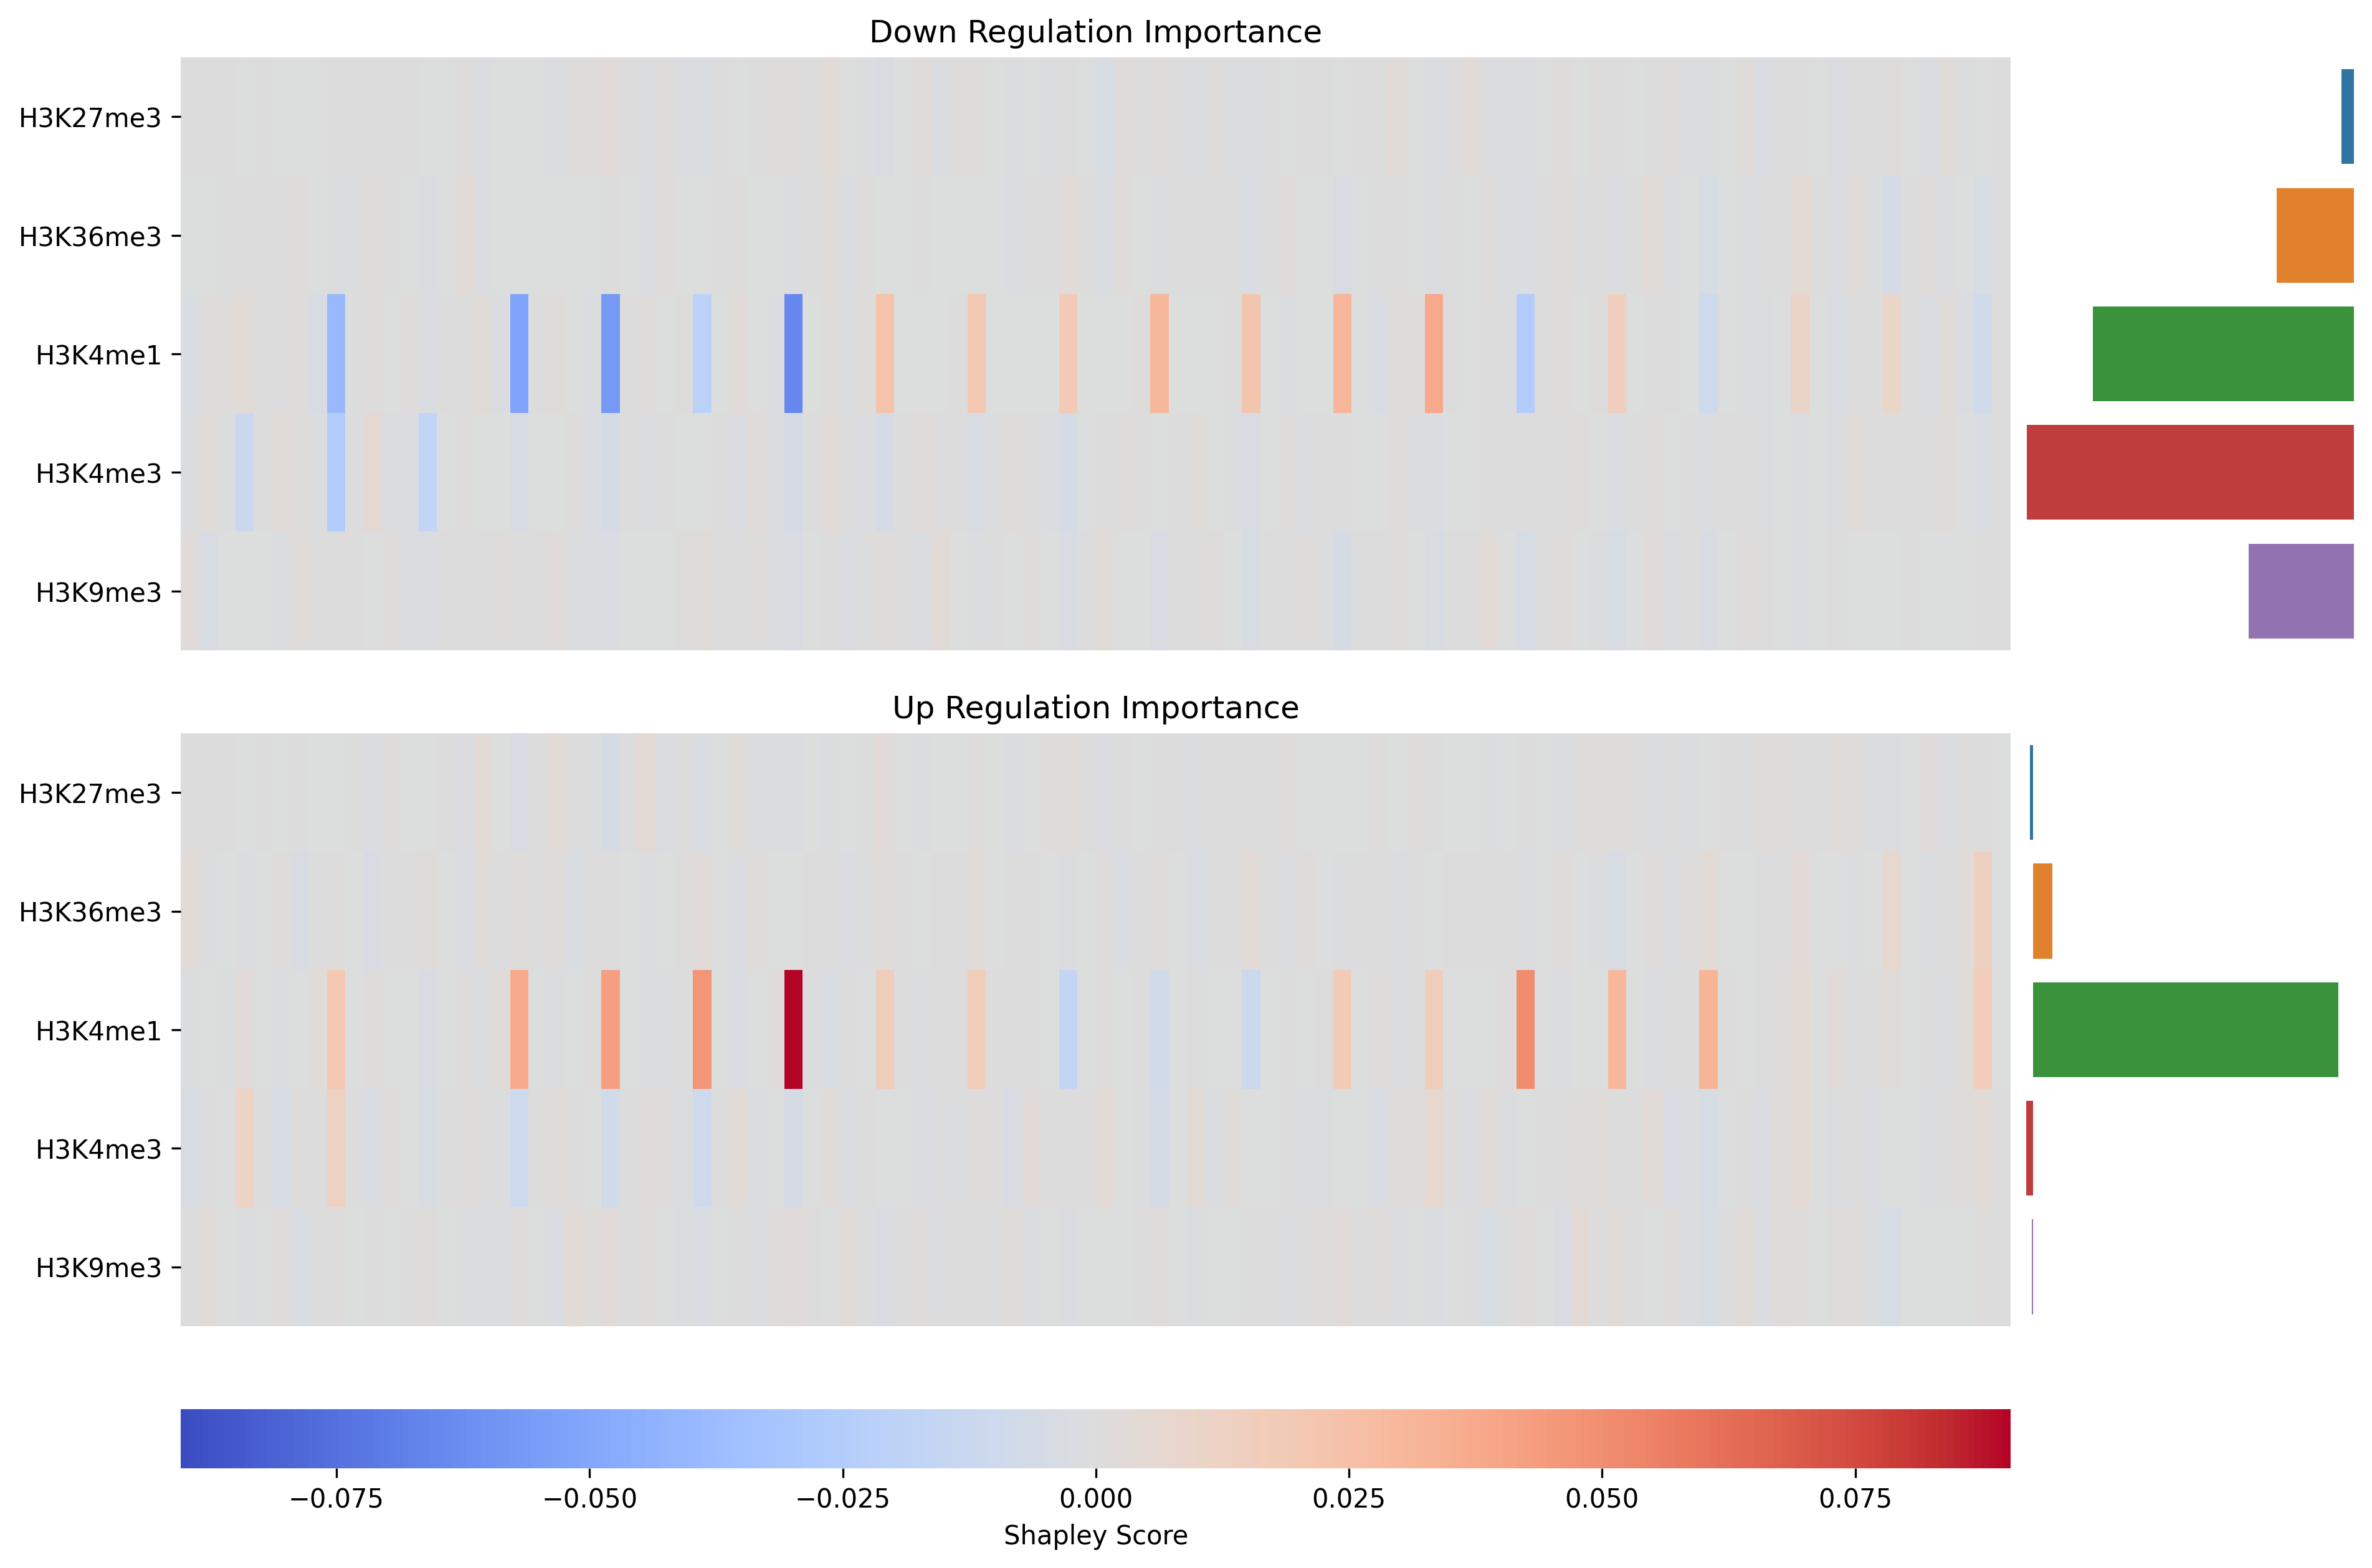

In [139]:
plt_cl(x)